In [5]:
import pandas as pd
import tensorflow as tf

In [6]:
df = pd.read_csv('//content/Assignment 1 Dataset.zip')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
train_df = df.sample(frac = 0.75, random_state= 4)
val_df = df.drop(train_df.index)

In [8]:
max_val = train_df.max(axis = 0)
min_val = train_df.min(axis = 0)
range = max_val - min_val

In [9]:
train_df = (train_df - min_val)/range

In [10]:
val_df = (val_df - min_val)/ range

In [11]:
X_train = train_df.drop('quality', axis = 1)
X_val = val_df.drop('quality', axis = 1)
y_trail = train_df['quality']
y_val = val_df['quality']

In [12]:
input_shape = [X_train.shape[1]]
input_shape

[11]

In [13]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units = 1, input_shape = input_shape)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 12        
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 64, activation = 'relu', input_shape = input_shape),
    tf.keras.layers.Dense(units = 64, activation = 'relu'),
    tf.keras.layers.Dense(units = 1)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                768       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4993 (19.50 KB)
Trainable params: 4993 (19.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(optimizer = 'adam', loss = 'mae')

In [16]:
losses = model.fit(X_train, y_trail, validation_data = (X_val, y_val), batch_size = 256, epochs = 15)

Epoch 1/15
5/5 [==============================] - 1s 50ms/step - loss: 0.4724 - val_loss: 0.3232
Epoch 2/15
5/5 [==============================] - 0s 10ms/step - loss: 0.2463 - val_loss: 0.1457
Epoch 3/15
5/5 [==============================] - 0s 13ms/step - loss: 0.1446 - val_loss: 0.1521
Epoch 4/15
5/5 [==============================] - 0s 13ms/step - loss: 0.1608 - val_loss: 0.1560
Epoch 5/15
5/5 [==============================] - 0s 14ms/step - loss: 0.1479 - val_loss: 0.1324
Epoch 6/15
5/5 [==============================] - 0s 9ms/step - loss: 0.1284 - val_loss: 0.1267
Epoch 7/15
5/5 [==============================] - 0s 9ms/step - loss: 0.1267 - val_loss: 0.1253
Epoch 8/15
5/5 [==============================] - 0s 9ms/step - loss: 0.1236 - val_loss: 0.1182
Epoch 9/15
5/5 [==============================] - 0s 9ms/step - loss: 0.1165 - val_loss: 0.1153
Epoch 10/15
5/5 [==============================] - 0s 13ms/step - loss: 0.1143 - val_loss: 0.1141
Epoch 11/15
5/5 [================

In [17]:
model.predict(X_val.iloc[0:3, :])

1/1 [==============================] - 0s 92ms/step


array([[0.4275679 ],
       [0.52020884],
       [0.38197953]], dtype=float32)

In [18]:
y_val.iloc[0:3]

0     0.4
9     0.4
12    0.4
Name: quality, dtype: float64

In [19]:
loss_df = pd.DataFrame(losses.history)

<Axes: >

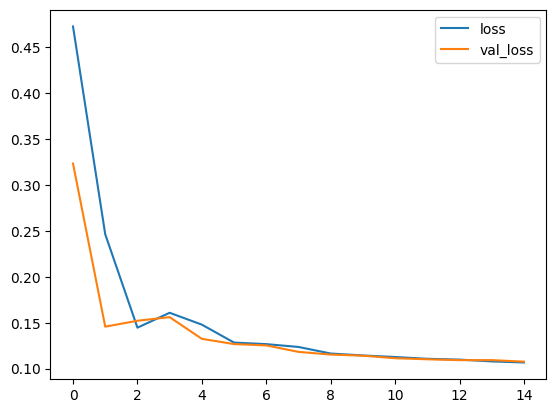

In [20]:
loss_df.loc[:,['loss','val_loss']].plot()